In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
%matplotlib inline

In [13]:
plt.rcParams["figure.figsize"] = (12,8) # set figure size

# Discrete random numbers

## Following code generates 10 binomial random variables with different n and p

In [3]:
nRandom = 10
n = np.arange(11, 11+nRandom)
p = np.linspace(0.2, 0.8, num=nRandom)

np.random.binomial(n, p)

array([ 3,  4,  5,  5,  7,  6, 16, 14, 15, 16])

## Following code generates 1000 poisson random variables with lambda=2

In [4]:
nRandom = 1000
Lambda = 2

out = np.random.poisson(Lambda, nRandom)
print('mean:', np.mean(out))
print('var:', np.var(out))

mean: 1.964
var: 2.0247040000000003


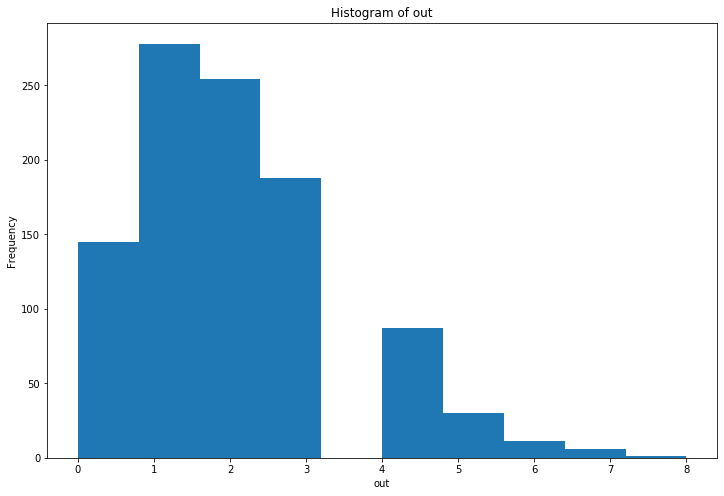

In [5]:
plt.hist(out)
plt.xlabel('out')
plt.ylabel('Frequency')
plt.title('Histogram of out');

## Following code gets PMF and CDF

In [11]:
poisson.pmf(3, mu=2)

0.18044704431548356

In [8]:
poisson.cdf(3, mu=2)

0.857123460498547

# Continuous random variables
## Following code generate 10000 (standard) Normal random variables with (mean=0, sd=1) and generate chi-square random variable

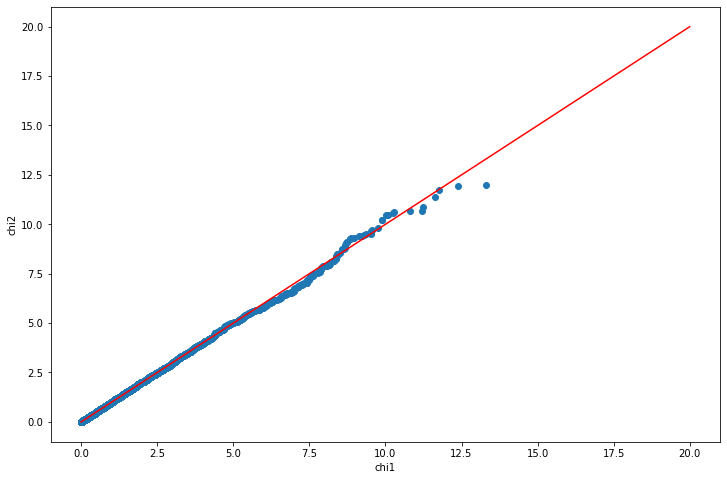

In [14]:
nRandom = 10000
Z = np.random.normal(loc=0, scale=1, size=nRandom)
chi1 = Z**2

# compare them with random numbers from chi
chi2 = np.random.chisquare(df=1, size=nRandom)

# Use QQ plot to compare
plt.scatter(np.sort(chi1), np.sort(chi2))
plt.plot([0,20],[0,20], c='red')
plt.xlabel('chi1')
plt.ylabel('chi2');

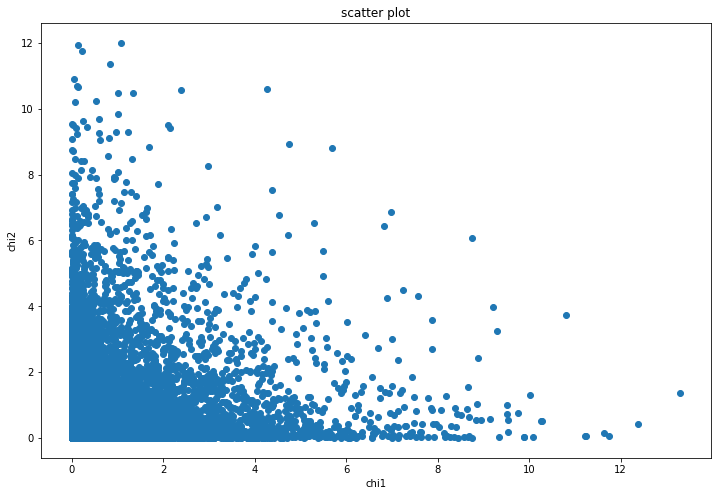

In [17]:
# How about scatter plot?
plt.scatter(chi1, chi2)
plt.xlabel('chi1')
plt.ylabel('chi2')
plt.title('scatter plot');

# Simulation studies to predict number of new COVID infection
## Researchers are interested in predicting the number of cases of COVID and the effect of the  intervention measures and policies. To do this, we consider a following simulation scheme
 * 5 days as one-time unit. So 20 time units for 100 days  
 * Initially there are 10 cases  
 * Each case has x close contacts in one-time unit, where x follows a Poisson distribution with lambda=10  
 * For each close contact, there is p=0.2 probability of the infection  
 * For simplicity, we consider that newly infected individual can only infect individuals in the next time unit (so only one time unit). It is similar after one-time unit, infected individuals are either detected/cured/died.  
 * Do not consider a situation that infected individual has a close contact with already infected individual.  

## The following code run for 10 time units (50 days) to get trajectory of new cases.

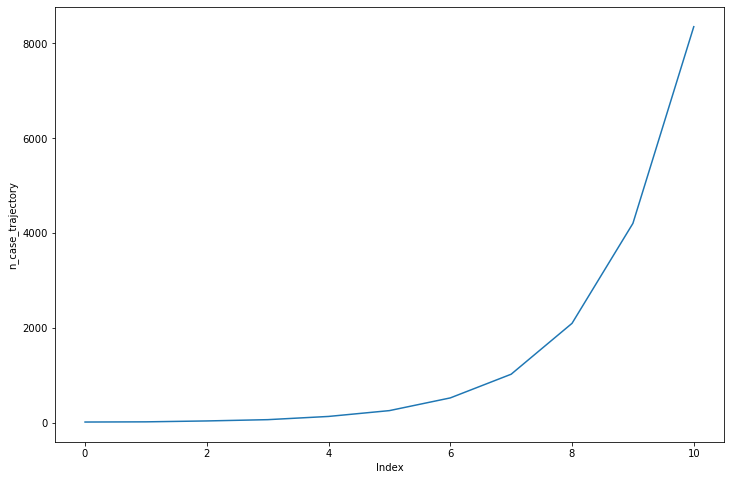

In [18]:
n_current_case = 10
n_case_trajectory = np.zeros(11)
n_case_trajectory[0] = 10

for i in range(10):
    n_contact = np.random.poisson(10, n_current_case)
    n_new_case = np.random.binomial(n_contact, 0.2)
    n_current_case = np.sum(n_new_case)
    n_case_trajectory[i+1] = n_current_case
    
plt.plot(n_case_trajectory)
plt.xlabel('Index')
plt.ylabel('n_case_trajectory');

### At day 50, people realize the severity of the problem and start to wash hand and wear a mask, which change p=0.14. Also government impose social distancing which changes lambda=3.
### Get the trajectory for the next 50 days

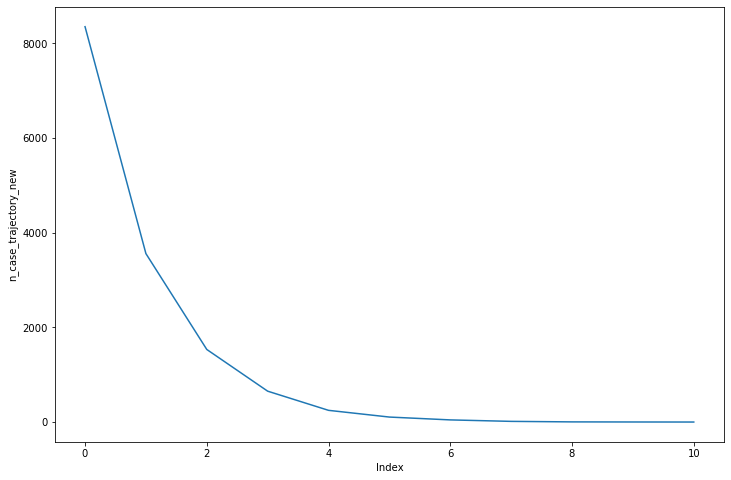

In [19]:
n_case_trajectory_new = np.zeros(11)
n_case_trajectory_new[0] = n_current_case

for i in range(10):
    n_contact = np.random.poisson(3, n_current_case)
    n_new_case = np.random.binomial(n_contact, 0.14)
    n_current_case = np.sum(n_new_case)
    n_case_trajectory_new[i+1] = n_current_case
    
plt.plot(n_case_trajectory_new)
plt.xlabel('Index')
plt.ylabel('n_case_trajectory_new');